<a href="https://colab.research.google.com/github/kridtapon/KDJ-CMO-Sync-Strategy/blob/main/KDJ_CMO_Sync_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.3 MB/s eta 0:00:00


In [2]:
pip install --upgrade yfinance

[*********************100%***********************]  1 of 1 completed


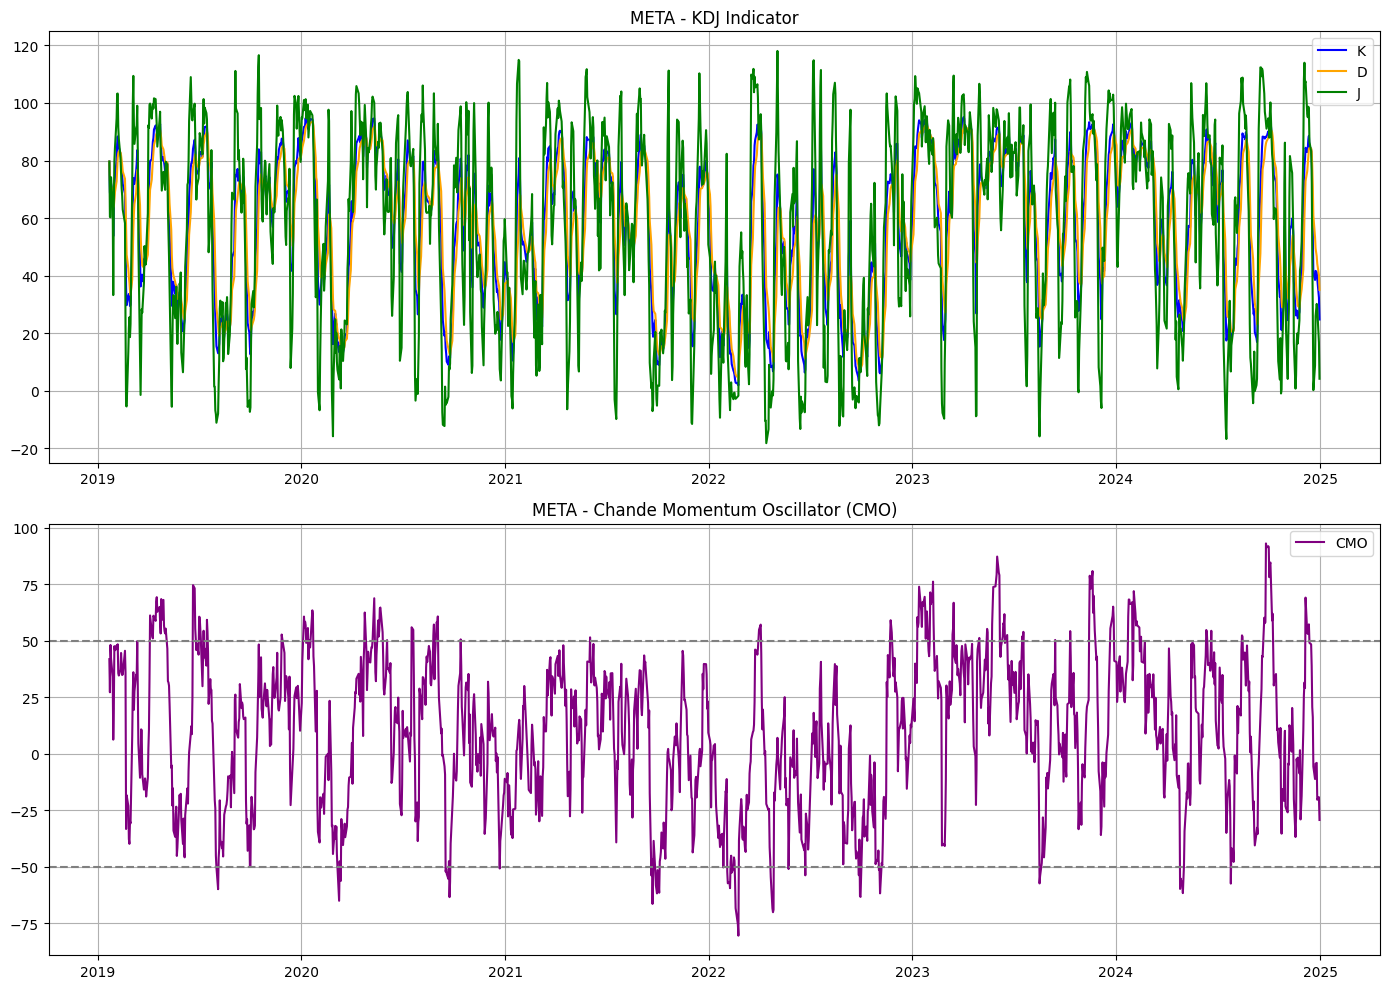

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# KDJ Indicator Calculation
def calculate_kdj(df, period=14):
    low_min = df['Low'].rolling(window=period).min()
    high_max = df['High'].rolling(window=period).max()
    rsv = 100 * (df['Close'] - low_min) / (high_max - low_min)

    K = rsv.ewm(com=2).mean()
    D = K.ewm(com=2).mean()
    J = 3 * K - 2 * D

    return K, D, J

# Chande Momentum Oscillator (CMO)
def calculate_cmo(df, period=14):
    diff = df['Close'].diff()
    up = diff.where(diff > 0, 0.0)
    down = -diff.where(diff < 0, 0.0)

    sum_up = up.rolling(window=period).sum()
    sum_down = down.rolling(window=period).sum()

    cmo = 100 * (sum_up - sum_down) / (sum_up + sum_down)
    return cmo

# Download historical data
symbol = 'META'
start_date = '2019-01-01'
end_date = '2025-01-01'
df = yf.download(symbol, start=start_date, end=end_date)

# Calculate indicators
K, D, J = calculate_kdj(df)
cmo = calculate_cmo(df)

# Plotting
plt.figure(figsize=(14, 10))

# KDJ subplot
plt.subplot(2, 1, 1)
plt.plot(df.index, K, label='K', color='blue')
plt.plot(df.index, D, label='D', color='orange')
plt.plot(df.index, J, label='J', color='green')
plt.title(f'{symbol} - KDJ Indicator')
plt.legend()
plt.grid(True)

# CMO subplot
plt.subplot(2, 1, 2)
plt.plot(df.index, cmo, label='CMO', color='purple')
plt.axhline(50, color='gray', linestyle='--')
plt.axhline(-50, color='gray', linestyle='--')
plt.title(f'{symbol} - Chande Momentum Oscillator (CMO)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


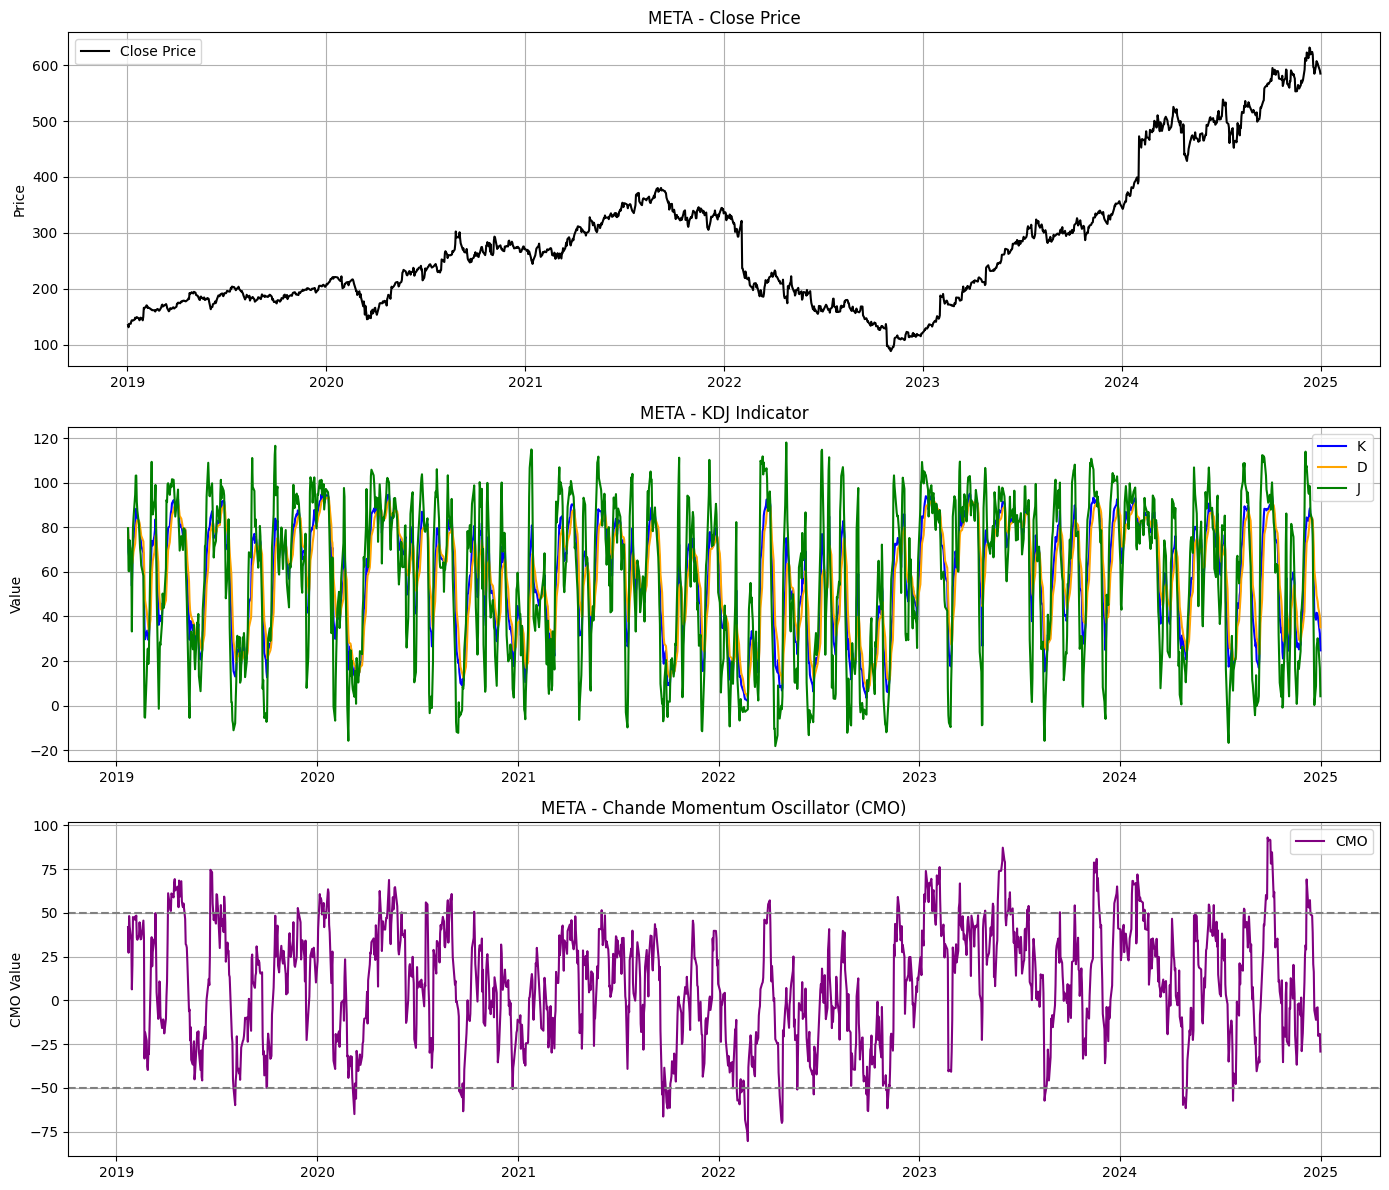

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# KDJ Indicator Calculation
def calculate_kdj(df, period=14):
    low_min = df['Low'].rolling(window=period).min()
    high_max = df['High'].rolling(window=period).max()
    rsv = 100 * (df['Close'] - low_min) / (high_max - low_min)

    K = rsv.ewm(com=2).mean()
    D = K.ewm(com=2).mean()
    J = 3 * K - 2 * D

    return K, D, J

# Chande Momentum Oscillator (CMO)
def calculate_cmo(df, period=14):
    diff = df['Close'].diff()
    up = diff.where(diff > 0, 0.0)
    down = -diff.where(diff < 0, 0.0)

    sum_up = up.rolling(window=period).sum()
    sum_down = down.rolling(window=period).sum()

    cmo = 100 * (sum_up - sum_down) / (sum_up + sum_down)
    return cmo

# Download historical data
symbol = 'META'
start_date = '2019-01-01'
end_date = '2025-01-01'
df = yf.download(symbol, start=start_date, end=end_date)

# Calculate indicators
K, D, J = calculate_kdj(df)
cmo = calculate_cmo(df)

# Plotting
plt.figure(figsize=(14, 12))

# Close Price subplot
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color='black')
plt.title(f'{symbol} - Close Price')
plt.ylabel('Price')
plt.grid(True)
plt.legend()

# KDJ subplot
plt.subplot(3, 1, 2)
plt.plot(df.index, K, label='K', color='blue')
plt.plot(df.index, D, label='D', color='orange')
plt.plot(df.index, J, label='J', color='green')
plt.title(f'{symbol} - KDJ Indicator')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# CMO subplot
plt.subplot(3, 1, 3)
plt.plot(df.index, cmo, label='CMO', color='purple')
plt.axhline(50, color='gray', linestyle='--')
plt.axhline(-50, color='gray', linestyle='--')
plt.title(f'{symbol} - Chande Momentum Oscillator (CMO)')
plt.ylabel('CMO Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# KDJ Indicator Calculation
def calculate_kdj(df, period=14):
    low_min = df['Low'].rolling(window=period).min()
    high_max = df['High'].rolling(window=period).max()
    rsv = 100 * (df['Close'] - low_min) / (high_max - low_min)

    K = rsv.ewm(com=2).mean()
    D = K.ewm(com=2).mean()
    J = 3 * K - 2 * D

    return K, D, J

# Chande Momentum Oscillator (CMO)
def calculate_cmo(df, period=14):
    diff = df['Close'].diff()
    up = diff.where(diff > 0, 0.0)
    down = -diff.where(diff < 0, 0.0)

    sum_up = up.rolling(window=period).sum()
    sum_down = down.rolling(window=period).sum()

    cmo = 100 * (sum_up - sum_down) / (sum_up + sum_down)
    return cmo

# Download historical data
symbol = 'ED'
start_date = '2019-01-01'
end_date = '2025-01-01'
df = yf.download(symbol, start=start_date, end=end_date, multi_level_index=False)

# Calculate indicators
df['K'], df['D'], df['J'] = calculate_kdj(df)
df['CMO'] = calculate_cmo(df)

# Entry Signal: J crosses above 20 and CMO > 0
df['J_prev'] = df['J'].shift(1)
df['CMO_prev'] = df['CMO'].shift(1)

df['Entry'] = (df['J_prev'] < 20) & (df['J'] > 20) | (df['CMO'] > 0)

# Exit Signal: J crosses below 80 and CMO < 0
df['Exit'] = (df['J_prev'] > 80) & (df['J'] < 80) & (df['CMO'] < 0)

# Filter test period
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Shift entry/exit to simulate next bar execution
entries = df['Entry'].shift(1).astype(bool).fillna(False).to_numpy()
exits = df['Exit'].shift(1).astype(bool).fillna(False).to_numpy()

# Build portfolio with Vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Open'],
    entries=entries,
    exits=exits,
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Show performance
print(portfolio.stats())

# Plot results
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed


Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                         1258 days 00:00:00
Start Value                              100000.0
End Value                           118887.168167
Total Return [%]                        18.887168
Benchmark Return [%]                    18.510209
Max Gross Exposure [%]                      100.0
Total Fees Paid                       1662.321035
Max Drawdown [%]                        27.074315
Max Drawdown Duration           493 days 00:00:00
Total Trades                                    8
Total Closed Trades                             7
Total Open Trades                               1
Open Trade PnL                      -17116.952129
Win Rate [%]                            71.428571
Best Trade [%]                          19.996321
Worst Trade [%]                         -3.967573
Avg Winning Trade [%]                    7.672322
Avg Losing Trade [%]                    -2.298413


[*********************100%***********************]  1 of 1 completed


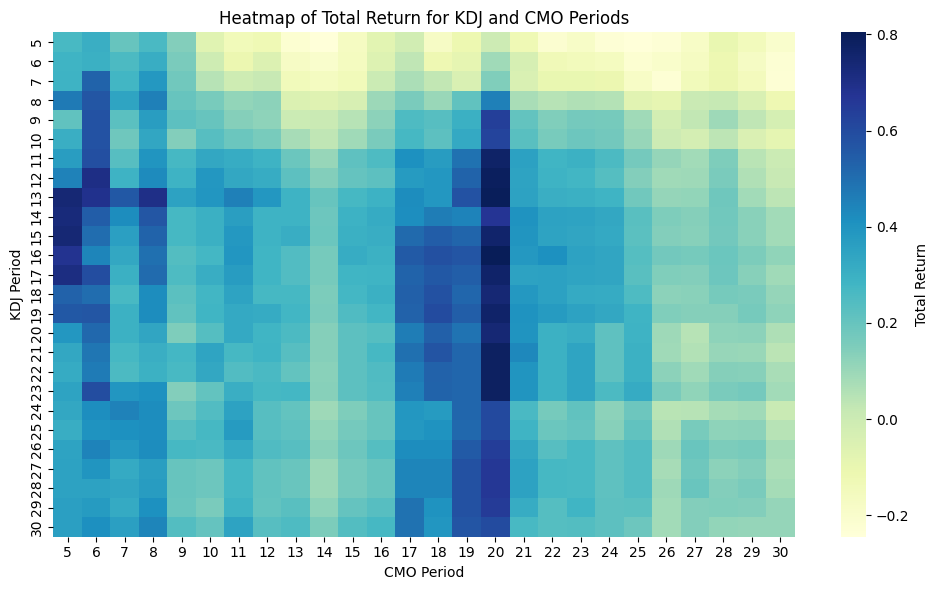


Best Parameters => KDJ Period: 16.0, CMO Period: 20.0
Best Total Return: 80.42%


In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import seaborn as sns
import matplotlib.pyplot as plt

# KDJ Calculation
def calculate_kdj(df, period):
    low_min = df['Low'].rolling(window=period).min()
    high_max = df['High'].rolling(window=period).max()
    rsv = 100 * (df['Close'] - low_min) / (high_max - low_min)
    K = rsv.ewm(com=2).mean()
    D = K.ewm(com=2).mean()
    J = 3 * K - 2 * D
    return K, D, J

# CMO Calculation
def calculate_cmo(df, period):
    diff = df['Close'].diff()
    up = diff.where(diff > 0, 0.0)
    down = -diff.where(diff < 0, 0.0)
    sum_up = up.rolling(window=period).sum()
    sum_down = down.rolling(window=period).sum()
    return 100 * (sum_up - sum_down) / (sum_up + sum_down)

# Download data
symbol = 'ED'
start_date = '2019-01-01'
end_date = '2025-01-01'
df = yf.download(symbol, start=start_date, end=end_date, multi_level_index=False)

# Optimization parameter ranges
kdj_range = range(5, 31)
cmo_range = range(5, 31)

results = []

# Grid search
for kdj_p in kdj_range:
    for cmo_p in cmo_range:
        temp_df = df.copy()
        temp_df['K'], temp_df['D'], temp_df['J'] = calculate_kdj(temp_df, period=kdj_p)
        temp_df['CMO'] = calculate_cmo(temp_df, period=cmo_p)

        # Generate signals
        temp_df['J_prev'] = temp_df['J'].shift(1)
        temp_df['Entry'] = (temp_df['J_prev'] < 20) & (temp_df['J'] > 20) | (temp_df['CMO'] > 0)
        temp_df['Exit'] = (temp_df['J_prev'] > 80) & (temp_df['J'] < 80) & (temp_df['CMO'] < 0)

        df_test = temp_df[(temp_df.index.year >= 2020) & (temp_df.index.year <= 2025)]

        entries = df_test['Entry'].shift(1).astype(bool).fillna(False).to_numpy()
        exits = df_test['Exit'].shift(1).astype(bool).fillna(False).to_numpy()

        portfolio = vbt.Portfolio.from_signals(
            close=df_test['Open'],
            entries=entries,
            exits=exits,
            init_cash=100_000,
            fees=0.001,
            slippage=0.002,
            freq='D'
        )

        total_return = portfolio.total_return()
        results.append((kdj_p, cmo_p, total_return))

# Convert results to DataFrame for heatmap
results_df = pd.DataFrame(results, columns=['KDJ_Period', 'CMO_Period', 'Total_Return'])
heatmap_data = results_df.pivot(index='KDJ_Period', columns='CMO_Period', values='Total_Return')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Total Return'})
plt.title("Heatmap of Total Return for KDJ and CMO Periods")
plt.xlabel("CMO Period")
plt.ylabel("KDJ Period")
plt.tight_layout()
plt.show()

# Print best parameters
best = results_df.loc[results_df['Total_Return'].idxmax()]
print(f"\nBest Parameters => KDJ Period: {best['KDJ_Period']}, CMO Period: {best['CMO_Period']}")
print(f"Best Total Return: {best['Total_Return']:.2%}")


In [12]:
# Calculate indicators
df['K'], df['D'], df['J'] = calculate_kdj(df, period=16)
df['CMO'] = calculate_cmo(df, period=20)

# Entry Signal: J crosses above 20 and CMO > 0
df['J_prev'] = df['J'].shift(1)
df['CMO_prev'] = df['CMO'].shift(1)

# Filter test period
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

df['Entry'] = (df['J_prev'] < 20) & (df['J'] > 20) | (df['CMO'] > 0)

# Exit Signal: J crosses below 80 and CMO < 0
df['Exit'] = (df['J_prev'] > 80) & (df['J'] < 80) & (df['CMO'] < 0)

# Shift entry/exit to simulate next bar execution
entries = df['Entry'].shift(1).astype(bool).fillna(False).to_numpy()
exits = df['Exit'].shift(1).astype(bool).fillna(False).to_numpy()

# Build portfolio with Vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Open'],
    entries=entries,
    exits=exits,
    init_cash=100_000,
    fees=0.001,
    slippage=0.002,
    freq='D'
)

# Show performance
print(portfolio.stats())

# Plot results
portfolio.plot().show()

<ipython-input-12-54c76eb6d206>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-54c76eb6d206>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                         1258 days 00:00:00
Start Value                              100000.0
End Value                           180417.805946
Total Return [%]                        80.417806
Benchmark Return [%]                    18.510209
Max Gross Exposure [%]                      100.0
Total Fees Paid                       3895.161729
Max Drawdown [%]                        24.329917
Max Drawdown Duration           451 days 00:00:00
Total Trades                                   15
Total Closed Trades                            15
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            66.666667
Best Trade [%]                          25.947994
Worst Trade [%]                         -4.842544
Avg Winning Trade [%]                    8.122277
Avg Losing Trade [%]                    -3.212224
